In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 3. Calculate stress at each fringe location for unnotched beam, plot stress vs. fringe order. Find fringe constant

In [3]:
thickness = 0.2165 #in
I_moment = (1/12)*thickness*(0.9975**3)
F = 125
fringe_location = np.array([0, 0.5, 1, 1.5, 2])
import sympy as sym
from sympy import *
L_1, L_2, L_3, L_4 = sym.symbols('L_1, L_2, L_3, L_4')
eq1 = sym.Eq(L_3 - L_2, 2)
eq2 = sym.Eq(L_3 + L_2, 5)
sym.solve((eq1, eq2), (L_2, L_3))

{L_2: 3/2, L_3: 7/2}

In [4]:
eq3 = sym.Eq(L_4 - L_1, 4)
eq4 = sym.Eq(L_1 + L_4, 5)
sym.solve((eq3, eq4), (L_1, L_4))

{L_1: 1/2, L_4: 9/2}

In [5]:
L_1 = 0.5
L_2 = 1.5
L_3 = 3.5
L_4 = 4.5
M = (F*(L_2 - L_1)*0.225) / 2 #convert to lbf in

In [6]:
print(M, "lbf in")

14.0625 lbf in


In [7]:
z = np.array([0, (0.657-0.522), (0.754-0.522), (0.872-0.522), (0.973-0.522)])
print(I_moment)
sigma = (M * z) / I_moment
print(sigma)

0.017906692166015627
[  0.         106.01832446 182.19445388 274.86232267 354.17973578]


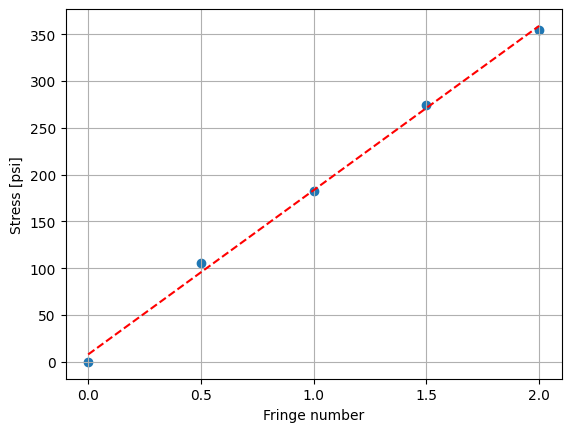

In [8]:
plt.scatter(fringe_location, sigma)
plt.xlabel('Fringe number')
plt.ylabel('Stress [psi]')
plt.grid()
z = np.polyfit(fringe_location, sigma, 1)
p = np.poly1d(z)
plt.plot(fringe_location,p(fringe_location),"r--")
plt.xticks(np.linspace(0,2,5))
plt.show()

In [12]:
#Equation of trendline
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

y=175.440694x+(8.010273)


In [13]:
slope = z[0]

In [14]:
#fringe constant
f_sigma = slope*thickness
print(f_sigma)

37.98291024072137


## 4. Calculate stress at each fringe location for beams using fringe constant

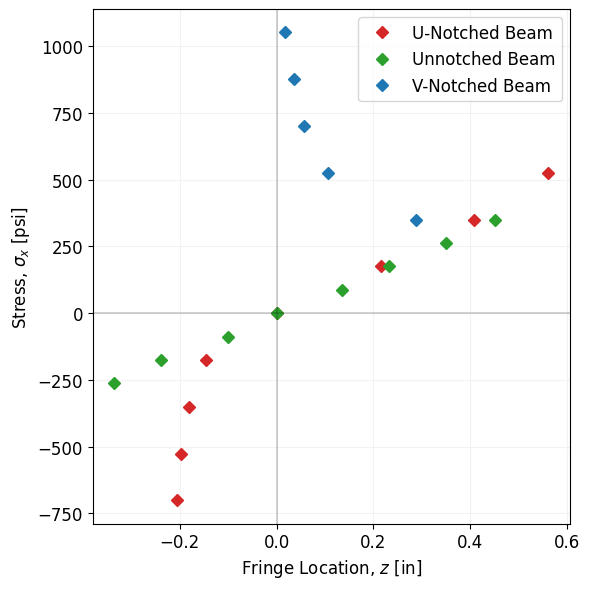

In [15]:
# store fringe number and location data in an array
# (fringe number n, location z)
z_u_notch = np.array(([-4, 0.015-0.221],[-3,0.023-0.221],[-2,0.039-0.221],[-1,0.075-0.221],
                      [0, 0.221-0.221], [1, 0.436-0.221], [2, 0.629-0.221], [3, 0.783-0.221]))

z_no_notch = np.array(([-1.5,0.187-0.522],[-1, 0.284-0.522], [-0.5,0.422-0.522],[0,0], [0.5,0.657-0.522],[1,(0.754-0.522)],[1.5,.872-.522], [2,(0.973-0.522)]))
z_v_notch = np.array(([2, 0.289], [3, 0.107], [4, 0.057], [5, 0.036], [6, 0.018]))

# calculate stress from fringe number
h = thickness
def fringe_stress(n):
    return n*f_sigma/h

# plot
fig = plt.figure(figsize=(6,6), tight_layout=True)
ax1 = fig.add_subplot(111)

ax1.plot(z_u_notch[:,1], fringe_stress(z_u_notch[:,0]), 'D', color='tab:red', label=r'U-Notched Beam')
ax1.plot(z_no_notch[:,1], fringe_stress(z_no_notch[:,0]), 'D', color='tab:green', label=r'Unnotched Beam')
ax1.plot(z_v_notch[:,1], fringe_stress(z_v_notch[:,0]), 'D', color='tab:blue', label=r'V-Notched Beam')

ax1.set_xlabel( r'Fringe Location, $z$ [in]',fontsize=12)
ax1.set_ylabel( r'Stress, $\sigma_x$ [psi]',fontsize=12)

ax1.legend(fontsize=12)
ax1.tick_params(labelsize=12)
ax1.grid(color='0.95')
ax1.axvline(0,color='k',linewidth=0.25)
ax1.axhline(0,color='k',linewidth=0.25)

# plt.savefig('stress_vs_location.png')